Quanutm arithmetic

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit.visualization import plot_histogram

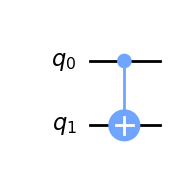

In [17]:
from qiskit import QuantumCircuit, Aer, QuantumRegister, ClassicalRegister
import numpy as ny
qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.draw("mpl")

Quantum addition

In [18]:
# Classical addition
a = 1  
b = 2
print(a + b)

3


In [19]:
print("{0:{fill}3b}".format(1, fill="0"))
print("{0:{fill}3b}".format(2, fill="0"))


001
010


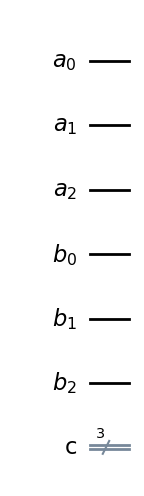

In [20]:
r_a = QuantumRegister(3, 'a')
r_b = QuantumRegister(3, 'b')
c_r = ClassicalRegister(3, 'c')
qc = QuantumCircuit(r_a, r_b, c_r)

qc.draw("mpl")

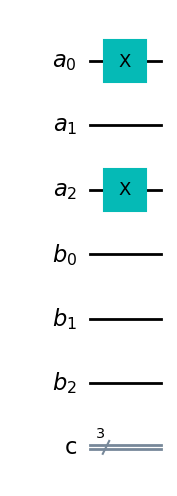

In [21]:
# Encode number 5
qc.x(r_a[0])
qc.x(r_a[2])

qc.draw("mpl")


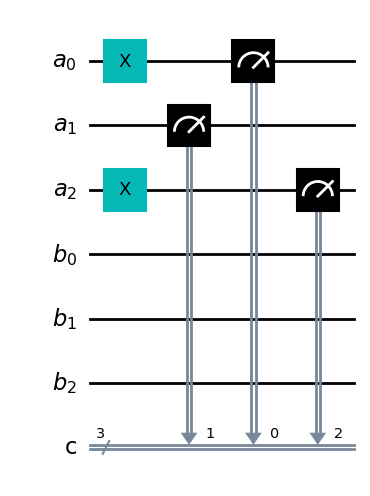

In [22]:
# measure r_a
qc.measure(r_a, c_r)
qc.draw("mpl")

In [ ]:
# run measurment
backend = Aer.get_backend("qasm_simulator")
job = qiskit.execute(qc, backend, shots = 50)

result = job.result()
counts = result.get_counts(qc)
print(counts)

Funciton to encode any number to a quantum circuit

In [26]:

def set_quantum_state(a, b):
    
    get_binary = lambda x : "{0:{fill}3b}".format(x, fill="0")

    r_a = QuantumRegister(3, 'a')
    r_b = QuantumRegister(3, 'b')
    c_r = ClassicalRegister(3, 'c')
    qc = QuantumCircuit(r_a, r_b, c_r)

    a_binary = get_binary(a)
    b_binary = get_binary(b)

    for i in range(3):
        if a_binary[i] == "1":
            qc.x(r_a[2-i])
        if b_binary[i] == "1":
            qc.x(r_b[2-i])
    
    return qc, r_a, r_b, c_r


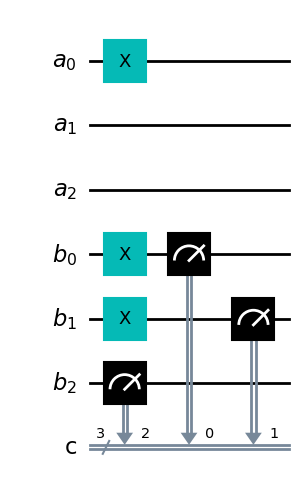

In [34]:
qc, r_a, r_b, c_r = set_quantum_state(1,3)
qc.measure(r_b, c_r)
qc.draw("mpl")

In [ ]:
# run measurment
backend = Aer.get_backend("qasm_simulator")
job = qiskit.execute(qc, backend, shots = 50)

result = job.result()
counts = result.get_counts(qc)
print(counts)